<a href="https://colab.research.google.com/github/harshit4311/0.Portfolio-Harshit-Shah/blob/main/Task-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import to_datetime
from sklearn.linear_model import LinearRegression

print('done')

done


In [127]:
df = pd.read_csv('/content/natural_gas.csv')

In [128]:
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


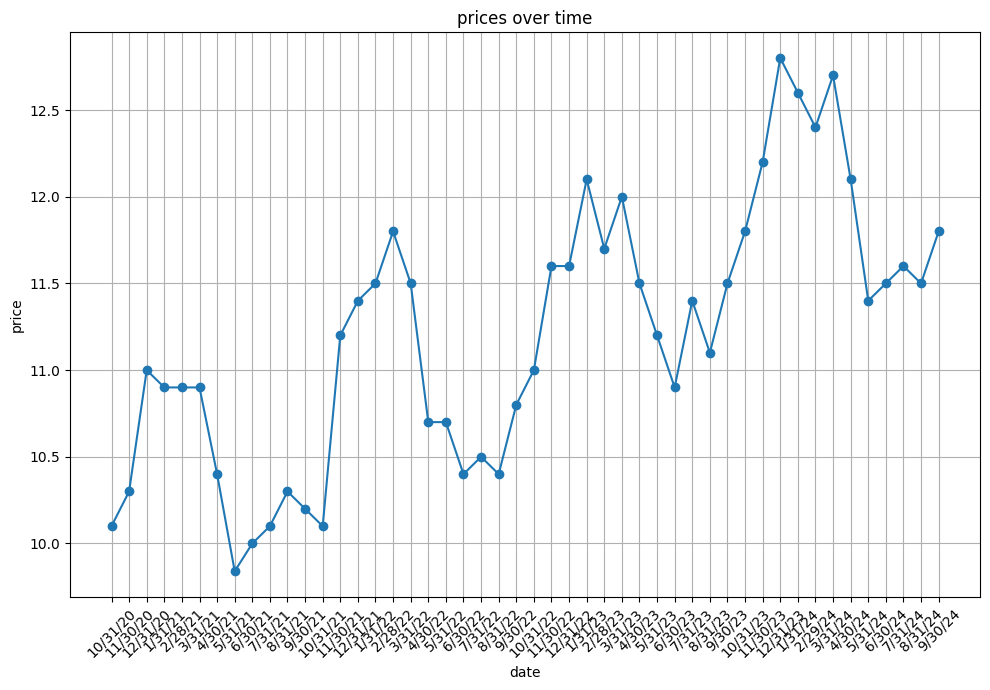

In [129]:
plt.figure(figsize=(10, 7))

plt.plot(df['Dates'], df['Prices'], marker='o')
plt.title('prices over time')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Using Linear Regression to predict prices

In [130]:
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')  # mm/dd/yy format

# apply the toordinal() function
df['Date_ordinal'] = df['Dates'].map(lambda date: date.toordinal())

X = df[['Date_ordinal']]
y = df['Prices']


In [131]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [132]:
def estimate_price(input_date):
    input_date = to_datetime(input_date).toordinal()
    predicted_price = model.predict([[input_date]])
    return predicted_price[0]


In [133]:
# extrapolate for one year into the future as said

future_dates = pd.date_range(start=df['Dates'].max(), periods=13, freq='M')
future_dates_ordinal = future_dates.map(lambda date: date.toordinal()).values.reshape(-1, 1)

future_prices = model.predict(future_dates_ordinal)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [134]:
# df for predictions

future_data = pd.DataFrame({'Dates': future_dates, 'Predicted Prices': future_prices})


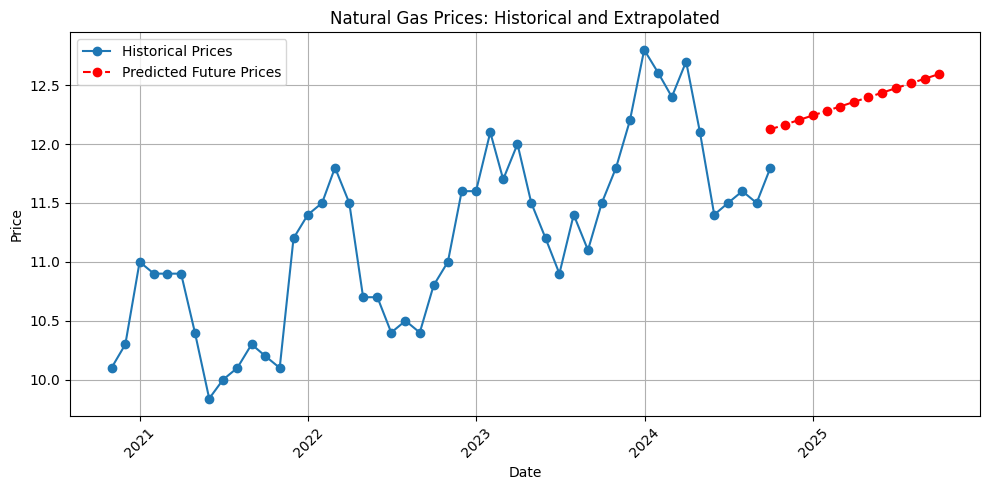

In [135]:
plt.figure(figsize=(10, 5))

plt.plot(df['Dates'], df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_data['Dates'], future_data['Predicted Prices'], marker='o', linestyle='--', color='r', label='Predicted Future Prices')

plt.title('Natural Gas Prices: Historical and Extrapolated')
plt.xlabel('Date')
plt.ylabel('Price')

plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Testing

In [136]:
print(estimate_price('2025-1-1'))


12.244096116864057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

predicted_prices = model.predict(X)

# accuracy metrics
mae = mean_absolute_error(y, predicted_prices)
mse = mean_squared_error(y, predicted_prices)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.4688411584713366
Mean Squared Error (MSE): 0.2701990582373101
Root Mean Squared Error (RMSE): 0.5198067508577684
R-squared (R²): 0.5195961507579936
